# Visualization : Cam EigenCam GradCam

In [1]:
from cams.visualizer import Visualizer
from utils.image import get_img_list_raf, img_to_input_tensor, pp_images, pp_blended_heatmaps, aligned_tensor
from utils.labels import get_labels

## Parameters

In [2]:
MODEL_NAME = 'FERplus-impr-std_0124-1040_weights.h5'
LAST_CONV_NAME = 'block3_conv3'
IMG_SHAPE = (100,100,3)
emotion_labels = get_labels(MODEL_NAME)
print(emotion_labels)

emotion = 'Sadness'
correct_label = emotion_labels.index('happiness')
num_imgs = 10

['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear']


## Input Images

Metal device set to: Apple M1


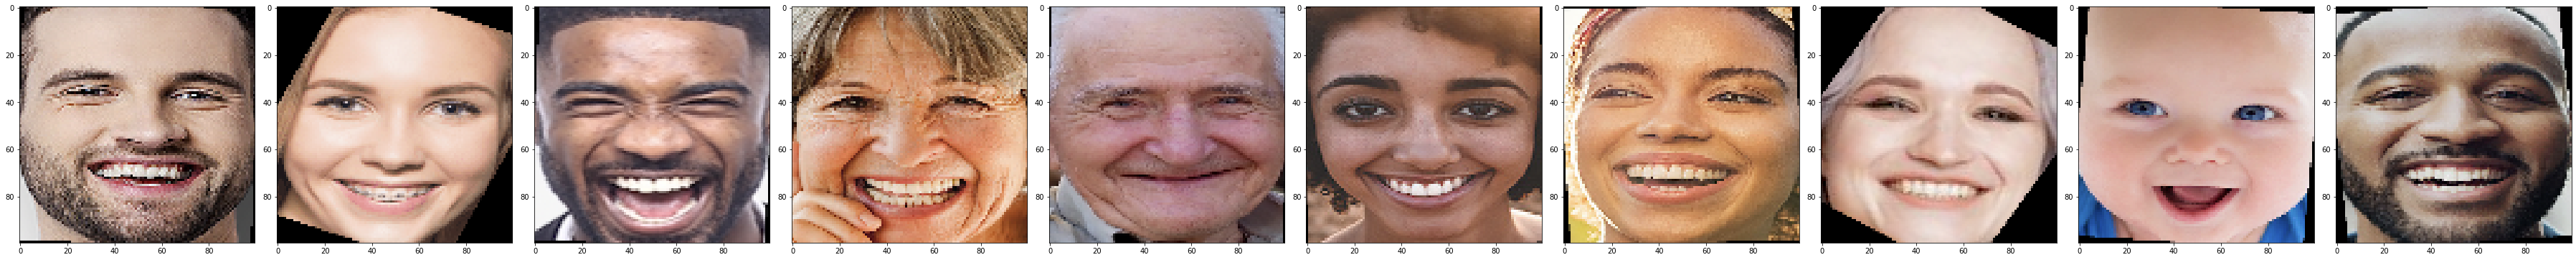

In [3]:
"""
img_list = get_img_list_raf(emotion, num_imgs)
img_tensors = img_to_input_tensor(img_list, IMG_SHAPE, RGB=True)
img_tensors_rgb = img_tensors
img_tensors_not_rgb = img_to_input_tensor(img_list, IMG_SHAPE, RGB=False)
pp_images(img_tensors)
"""

img_list = ['./data/emotion/happy/happy_{n}.png'.format(n=i) for i in range(1,num_imgs+1)]
img_tensors, img_tensors_rgb, img_tensors_not_rgb = aligned_tensor(img_list, IMG_SHAPE)
pp_images(img_tensors,figsize=(50,10))

## Visualizer

In [4]:
vis = Visualizer(MODEL_NAME, LAST_CONV_NAME, IMG_SHAPE)

## get heatmaps : Cam, EigenCam, GradCam

In [5]:
heatmap_CAM, pred_CAM = vis.getCAM(img_tensors_not_rgb)
heatmap_CAM_1, pred_CAM_1= vis.getCAM(img_tensors_not_rgb, start_idx=correct_label)
heatmap_EigenCam, pred_EigenCam = vis.getEigenCAM(img_tensors_rgb)
heatmap_EigenCam_p, pred_EigenCam_p = vis.getEigenCAM(img_tensors_not_rgb, True)
heatmap_GradCam, pred_GradCam = vis.getGradCAM(img_tensors_rgb)
heatmap_GradCam_1, pred_GradCam_1 = vis.getGradCAM(img_tensors_rgb, preprocess=False, start_idx=correct_label)
heatmap_GradCam_p, pred_GradCam_p = vis.getGradCAM(img_tensors_not_rgb, preprocess=True)

## Result

## Blended :
#### Cam, Cam_from_correct, EigenCam, EigenCam_preprocessing, GradCam, GradCam_from_correct, GradCam_from_preprocessing

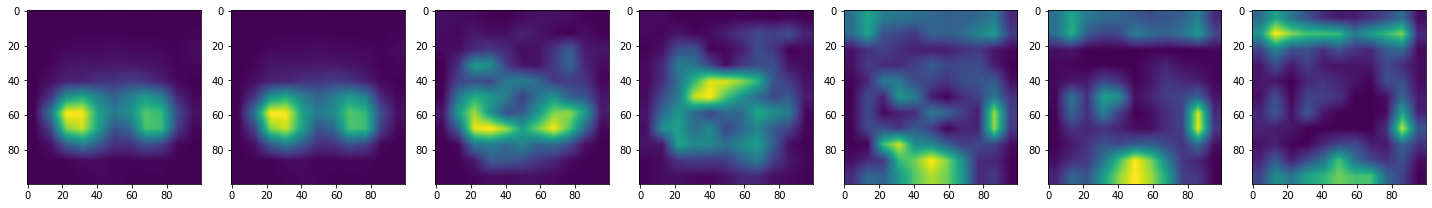

In [6]:
pp_blended_heatmaps([heatmap_CAM, heatmap_CAM_1, heatmap_EigenCam, heatmap_EigenCam_p, heatmap_GradCam, heatmap_GradCam_1, heatmap_GradCam_p], figsize=(20,6))

## Cam

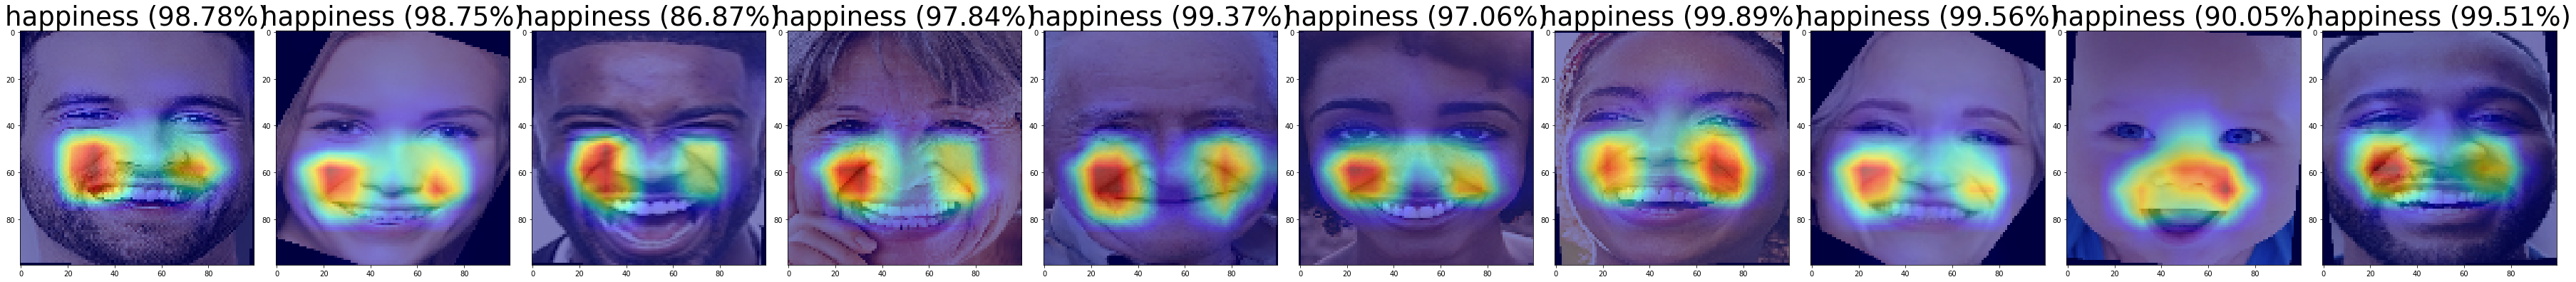

In [7]:
pp_images(img_tensors, heatmap_CAM, pred_CAM, emotion_labels, figsize=(50,10))

### Cam_from_correct

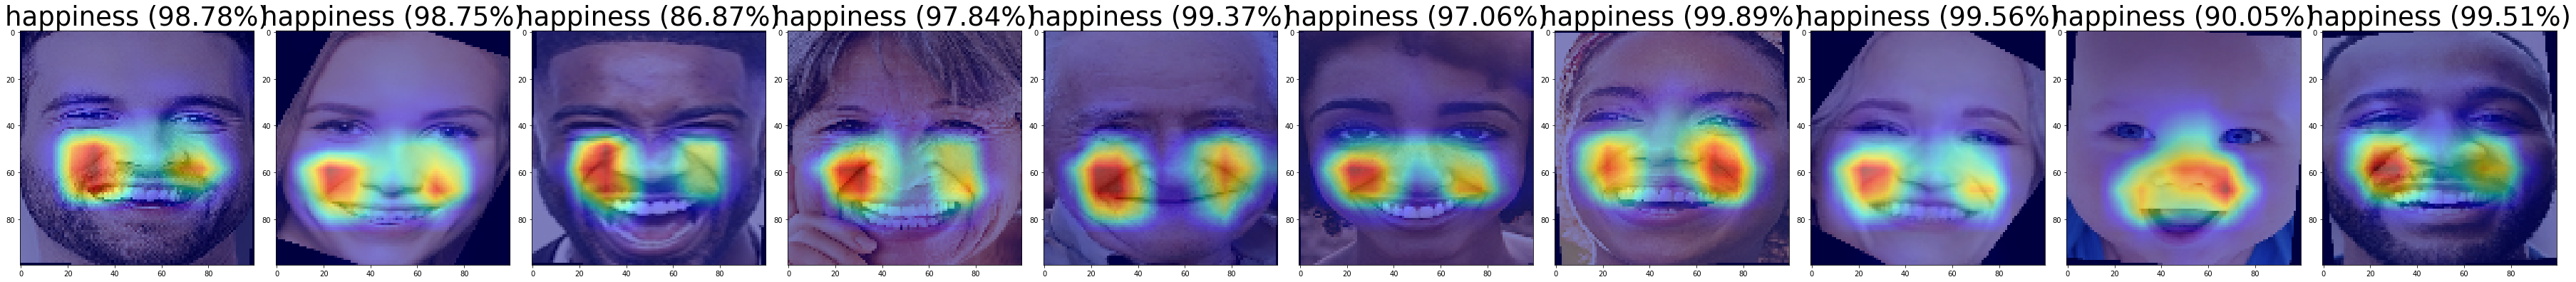

In [8]:
pp_images(img_tensors, heatmap_CAM_1, pred_CAM_1, emotion_labels, figsize=(50,10))

## EigenCam

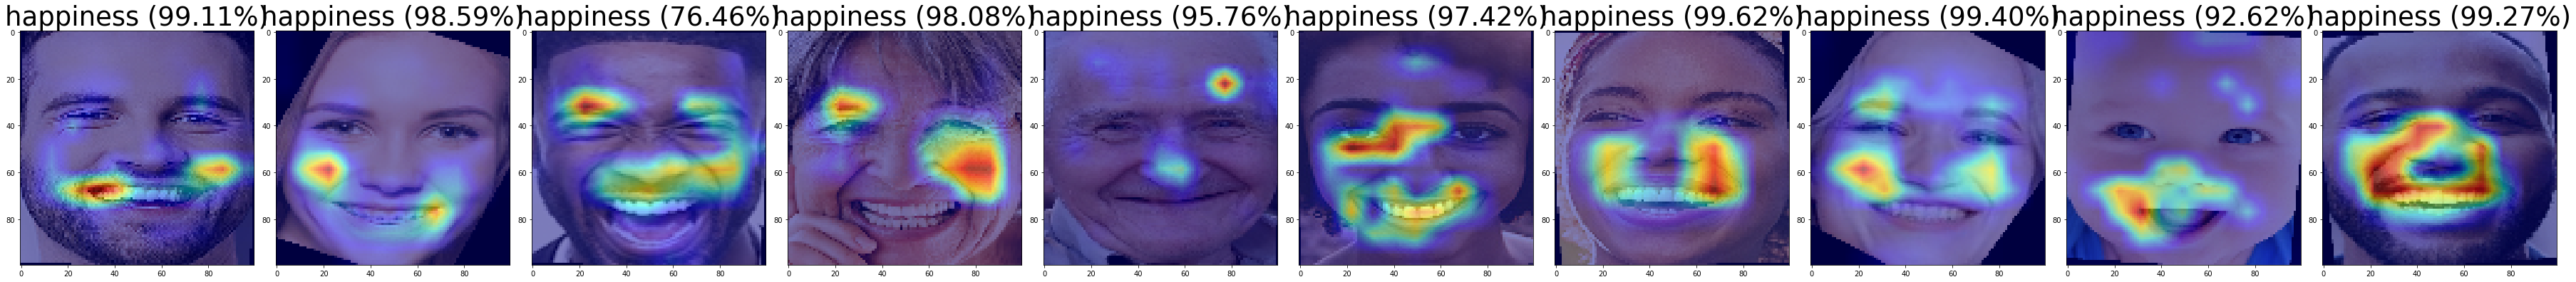

In [9]:
pp_images(img_tensors, heatmap_EigenCam, pred_EigenCam, emotion_labels, figsize=(50,10))

### EigenCam_preprocessing

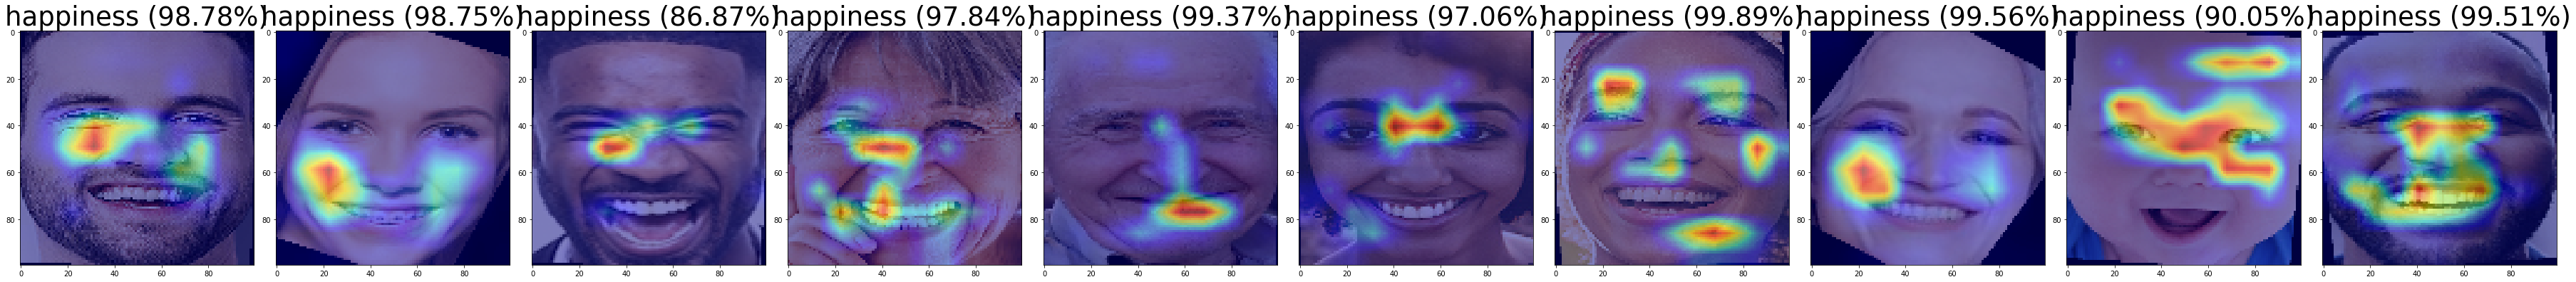

In [10]:
pp_images(img_tensors, heatmap_EigenCam_p, pred_EigenCam_p, emotion_labels, figsize=(50,10))

## GradCam

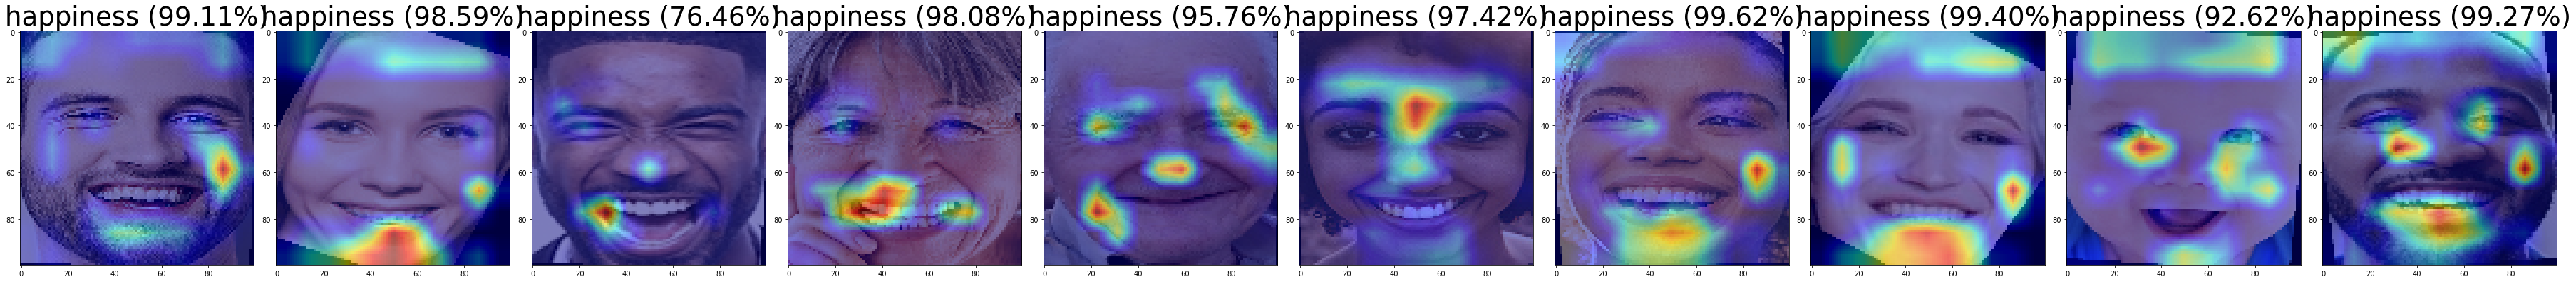

In [11]:
pp_images(img_tensors, heatmap_GradCam, pred_GradCam, emotion_labels, figsize=(50,10))

### GradCam_from_correct

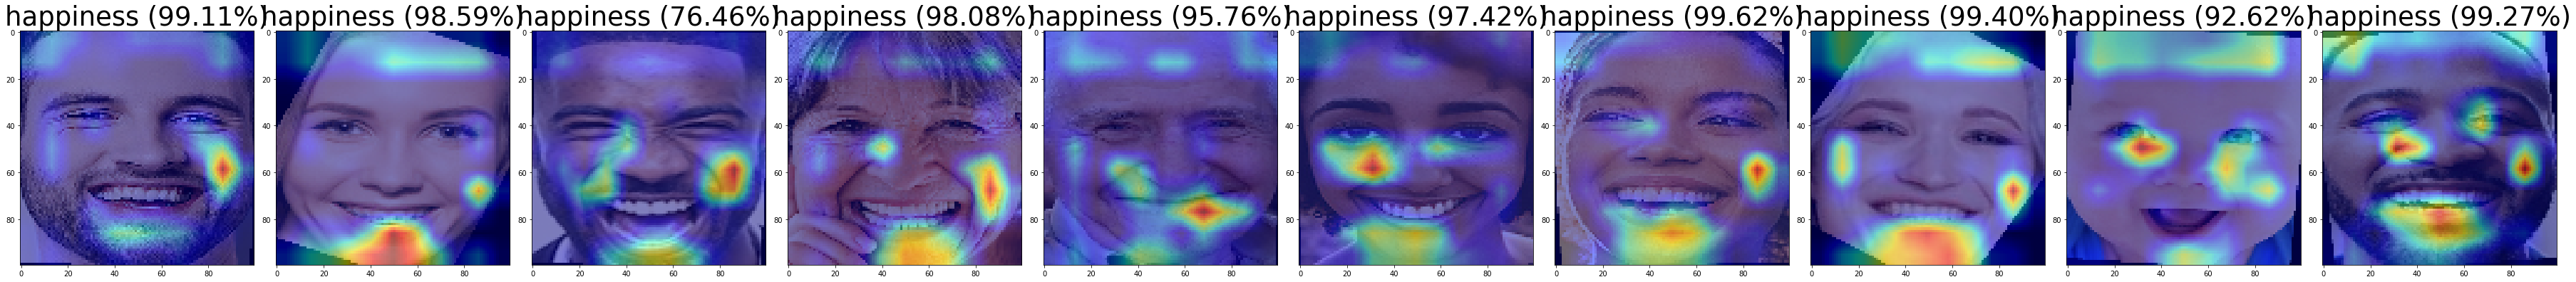

In [12]:
pp_images(img_tensors, heatmap_GradCam_1, pred_GradCam_1, emotion_labels, figsize=(50,10))

### GradCam_preprocessing

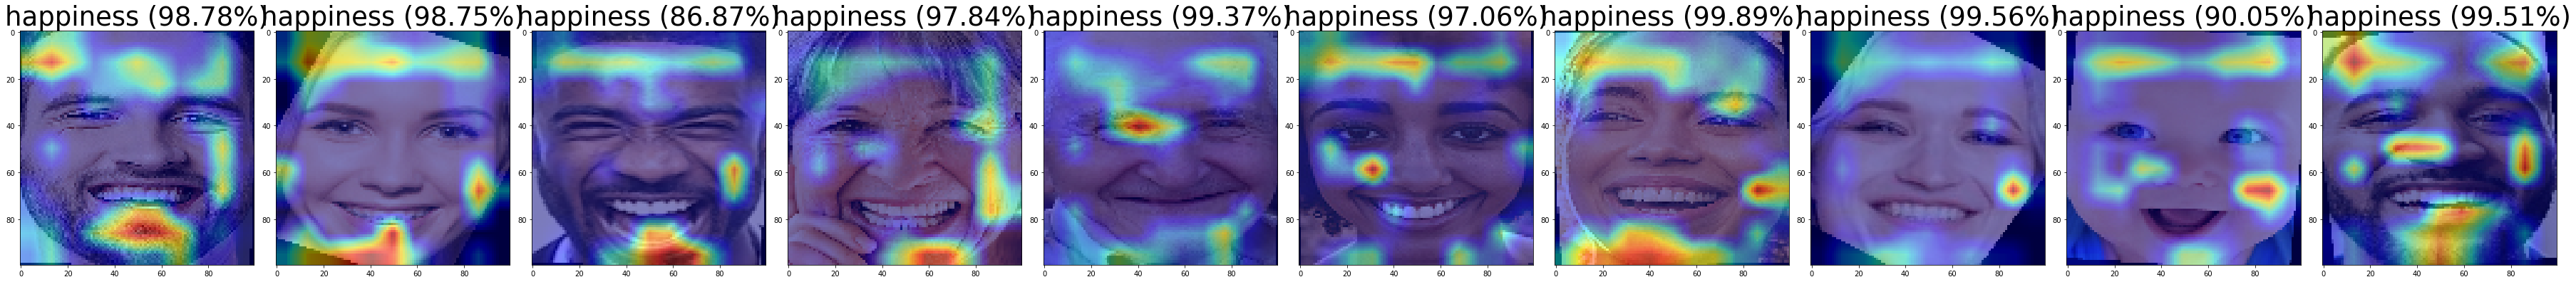

In [13]:
pp_images(img_tensors, heatmap_GradCam_p, pred_GradCam_p, emotion_labels, figsize=(50,10))

['./data/RAF/images/test_1854_aligned.jpg', './data/RAF/images/test_1324_aligned.jpg', './data/RAF/images/test_2052_aligned.jpg', './data/RAF/images/test_1642_aligned.jpg', './data/RAF/images/test_1949_aligned.jpg', './data/RAF/images/test_1753_aligned.jpg', './data/RAF/images/test_2017_aligned.jpg', './data/RAF/images/test_0716_aligned.jpg', './data/RAF/images/test_0952_aligned.jpg', './data/RAF/images/test_2167_aligned.jpg', './data/RAF/images/test_1824_aligned.jpg', './data/RAF/images/test_1262_aligned.jpg', './data/RAF/images/test_0024_aligned.jpg', './data/RAF/images/test_0471_aligned.jpg', './data/RAF/images/test_0145_aligned.jpg', './data/RAF/images/test_1085_aligned.jpg', './data/RAF/images/test_1809_aligned.jpg', './data/RAF/images/test_0264_aligned.jpg', './data/RAF/images/test_1091_aligned.jpg', './data/RAF/images/test_1771_aligned.jpg']

img_list = ['./data/RAF/images/test_2061_aligned.jpg', './data/RAF/images/test_1042_aligned.jpg', './data/RAF/images/test_2204_aligned.jpg', './data/RAF/images/test_1009_aligned.jpg', './data/RAF/images/test_2050_aligned.jpg', './data/RAF/images/test_0593_aligned.jpg', './data/RAF/images/test_0006_aligned.jpg', './data/RAF/images/test_1809_aligned.jpg', './data/RAF/images/test_0738_aligned.jpg', './data/RAF/images/test_1112_aligned.jpg']